# 05.Classification model decision bondary & model evaluation

### 1. Decision Boundary

In [32]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append(r"d:\\Practice\\Machine Learning\\04.Logistic Regression")
print('sys.path')
import ML_basic_function
# from ML_basic_function import *

sys.path


In [4]:
x1, x2 = np.meshgrid(np.arange(3),np.arange(1,4))
[x1,x1]

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])]

In [6]:
np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1), np.ones(shape=(9, 1))], 1)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [0., 2., 1.],
       [1., 2., 1.],
       [2., 2., 1.],
       [0., 3., 1.],
       [1., 3., 1.],
       [2., 3., 1.]])

In [9]:
def logit_DB(X,w,y):

    x1, x2 = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 1000).reshape(-1, 1),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 1000).reshape(-1, 1))
    
    X_temp = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1), np.ones(shape= (1000000, 1))],1)

    y_hat_temp = logit_cla(sigmoid(X_temp.dot(w)))
    yhat = y_hat_temp.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#90CAF9'])
    plt.contour(x1, x2, yhat, capm=custom_cmap)

> https://www.fontke.com/tool/rgb

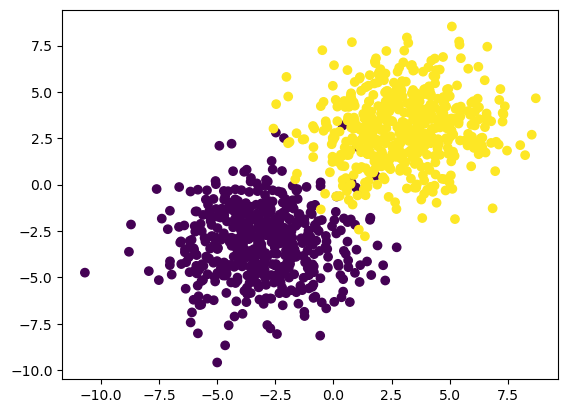

In [13]:
np.random.seed(21)

f, l = arrayGenCla(num_class = 2, deg_dispersion= [6, 2], bias= True)

np.random.seed(21)

Xtrain, Xtest, ytrain, ytest = array_split(f, l)

mean_ = Xtrain[:, :-1].mean(axis=0)
std_ = Xtrain[:, :-1].std(axis=0)

Xtrain[:, :-1] = (Xtrain[:, :-1] - mean_) / std_
Xtest[:, :-1] = (Xtest[:, :-1] - mean_) / std_

plt.scatter(f[:, 0], f[:, 1], c=l)

In [26]:
np.random.seed(21)

barch_size = 50
num_epoch = 200
lr_init = 0.2

n = f.shape[1]
w = np.random.randn(n, 1)

train_acc = []
test_acc = []

lr_lambda = lambda epoch: 0.95 ** epoch

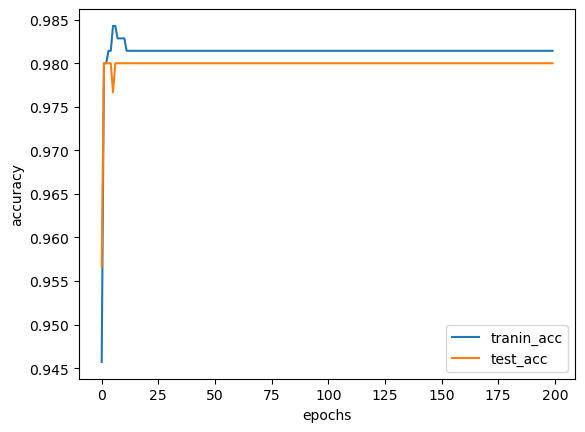

In [27]:
for i in range(num_epoch):
    w = sgd_cal(Xtrain, w, ytrain, logit_gd, batch_size=barch_size, epoch=1, lr=lr_init*lr_lambda(i))
    train_acc.append(logit_acc(Xtrain, w, ytrain, thr=0.5))
    test_acc.append(logit_acc(Xtest, w, ytest, thr=0.5))

plt.plot(list(range(num_epoch)), np.array(train_acc).flatten(), label='tranin_acc')
plt.plot(list(range(num_epoch)), np.array(test_acc).flatten(), label='test_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc=4)

In [28]:
w

array([[2.51852948],
       [2.73203366],
       [0.34573989]])

C:\Users\25420\AppData\Local\Temp\ipykernel_1508\3763148218.py:13: UserWarning: The following kwargs were not used by contour: 'capm'
  plt.contour(x1, x2, yhat, capm=custom_cmap)


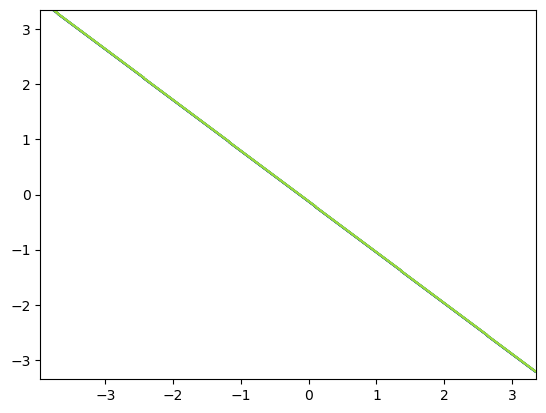

In [29]:
logit_DB(Xtrain, w, ytrain)

C:\Users\25420\AppData\Local\Temp\ipykernel_1508\3763148218.py:13: UserWarning: The following kwargs were not used by contour: 'capm'
  plt.contour(x1, x2, yhat, capm=custom_cmap)


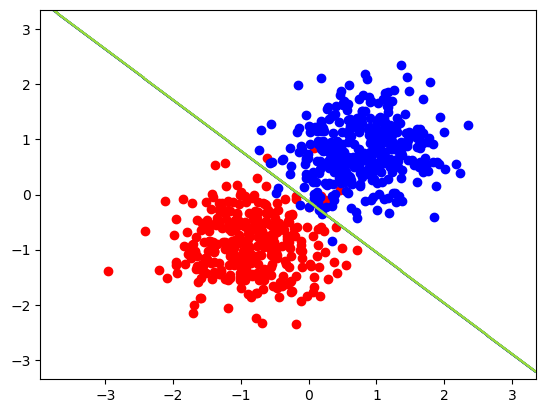

In [30]:
logit_DB(Xtrain, w, ytrain)
plt.scatter(Xtrain[(ytrain == 0).flatten(), 0], Xtrain[(ytrain == 0).flatten(), 1], color='red')
plt.scatter(Xtrain[(ytrain == 1).flatten(), 0], Xtrain[(ytrain == 1).flatten(), 1], color='blue')

C:\Users\25420\AppData\Local\Temp\ipykernel_1508\3763148218.py:13: UserWarning: The following kwargs were not used by contour: 'capm'
  plt.contour(x1, x2, yhat, capm=custom_cmap)


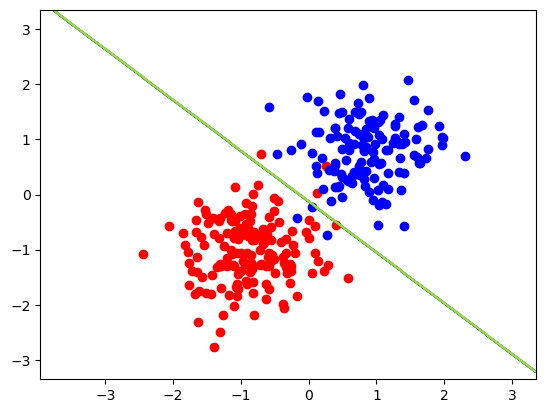

In [31]:
logit_DB(Xtrain, w, ytrain)
plt.scatter(Xtest[(ytest == 0).flatten(), 0], Xtest[(ytest == 0).flatten(), 1], color='red')
plt.scatter(Xtest[(ytest == 1).flatten(), 0], Xtest[(ytest == 1).flatten(), 1], color='blue')

In [34]:
from sklearn import datasets

In [37]:
iris_df = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris_df['data'], iris_df['target']],columns= iris_df['feature_names'] + ['species'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [44]:
iris_df.iloc[:, 1: 3]

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


### 2. confusion matrix & F1-score

<center><img src="https://i.loli.net/2021/05/30/tqu1naCcVKNW5Mv.jpg" alt="98" style="zoom:50%;" />

$$
Recall = \frac{TP}{TP+FN}
$$

$$
Precision = \frac{TP}{TP+FP}
$$

$$
F1-Score = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}}=\frac{2 \cdot Recall \cdot Precision}{Recall+Precision}
$$

$$
F1-Score = \frac{2\cdot TP}{2\cdot TP+FP+FN}
$$

$$
BA(balanced accuracy) = \frac{Recall+Precision}{2}
$$

$$
F_\beta=(1+\beta ^2)\frac{precision \cdot recall}{(\beta ^2 \cdot precision)+recall}
$$

- Specificity --true negative rate (TNR)

$$
Specificity = \frac{TN}{TN+FP}
$$

- negative predictive value NPV

$$
NPV = \frac{TN}{TN+FN}
$$

- false positive rate

$$
FPR = 1-specificity=\frac{FP}{FP+TN}
$$

> The selection of evaluation indicators also needs to be judged according to the situation. If only need to consider the recognition rate of 1 category, you can consider using Recall as the model evaluation indicator. If you only need to consider the accuracy rate in the discrimination result of 1 sample, you can consider Use Precision as the evaluation metric. But generally speaking, there are not many of these two situations. The more common situation is that we need to focus on identifying category 1 but also take into account the accuracy of category 0. In this case, we can use the F1-Score indicator. At present, F1-Score is actually the most common and common classification indicator in classification models. 

<center><img src="https://i.loli.net/2021/06/02/pVEc5CvLzq2dFy8.jpg" alt="103" style="zoom:67%;" />

### ROC (Receiver operating characteristic) & AUC (Area Under Curve)

<center><img src="https://i.loli.net/2021/06/02/WNToIb4wBDjY51V.jpg" alt="107" style="zoom:67%;" />

<center><img src="https://i.loli.net/2021/06/03/Q5FMelmqc4ApTJz.jpg" alt="3" style="zoom:67%;" />

<center><img src="https://i.loli.net/2021/06/03/zE4IaGySnxusQhN.jpg" alt="4" style="zoom:67%;" />

<center><img src="https://i.loli.net/2021/06/03/dCw9YzoBmjskiTH.jpg" alt="7" style="zoom:50%;" />

In [45]:
def ROC_curve(yhat, y, thr_l, label='ROC_curve'):

    TPR_l = []
    FPR_l = []
    for i in thr_l:
        y_cla = logit_cla(yhat, thr=i)
        P = y_cla[y == 1]
        TPR = P.mean()
        TPR_l.append(TPR)
        N = y_cla[y == 0]
        FPR = N.mean()
        FPR_l.append(FPR)
    plt.plot(FPR_l, TPR_l, label=label)

In [46]:
np.random.seed(24)

f, l = arrayGenCla(num_class = 2, deg_dispersion = [4, 2], bias = True)          # 离散程度较小

mean_ = f[:, :-1].mean(axis=0)
std_ = f[:, :-1].std(axis=0)

f[:, :-1] = (f[:, :-1] - mean_) / std_

np.random.seed(24)  

batch_size = 50
num_epoch = 200
lr_init = 0.2

n = f.shape[1]
w = np.random.randn(n, 1)

lr_lambda = lambda epoch: 0.95 ** epoch

In [48]:
thr_l = np.linspace(1, 0, 100)

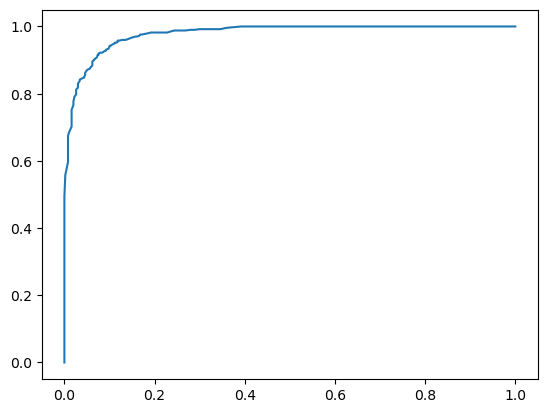

In [49]:
for i in range(num_epoch):
    w = sgd_cal(f, w, l, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))

yhat = sigmoid(f.dot(w))

ROC_curve(yhat, l, thr_l)